In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

import genetic_algorithm as ga
from nn_ga import GenAlgNN

In [2]:
from math import pi, sin, cos
theta = 0.5 * pi
while theta < 3.5 * pi:
    r = theta * 1.5 / pi
    x = r * sin(theta)
    y = r * cos(theta)
    print(f'{x:.6f},{y:.6f},1')
    print(f'{-x:.6f},{-y:.6f},-1')
    theta += 0.25 / r

0.750000,0.000000,1
-0.750000,-0.000000,-1
0.859112,-0.297471,1
-0.859112,0.297471,-1
0.853805,-0.594600,1
-0.853805,0.594600,-1
0.763614,-0.866788,1
-0.763614,0.866788,-1
0.609738,-1.100935,1
-0.609738,1.100935,-1
0.409159,-1.290021,1
-0.409159,1.290021,-1
0.176019,-1.430767,1
-0.176019,1.430767,-1
-0.077731,-1.522375,1
0.077731,1.522375,-1
-0.341953,-1.565758,1
0.341953,1.565758,-1
-0.608058,-1.563034,1
0.608058,1.563034,-1
-0.868812,-1.517160,1
0.868812,1.517160,-1
-1.118178,-1.431671,1
1.118178,1.431671,-1
-1.351179,-1.310483,1
1.351179,1.310483,-1
-1.563789,-1.157744,1
1.563789,1.157744,-1
-1.752822,-0.977710,1
1.752822,0.977710,-1
-1.915847,-0.774662,1
1.915847,0.774662,-1
-2.051103,-0.552827,1
2.051103,0.552827,-1
-2.157422,-0.316325,1
2.157422,0.316325,-1
-2.234162,-0.069128,1
2.234162,0.069128,-1
-2.281146,0.184980,1
2.281146,-0.184980,-1
-2.298599,0.442423,1
2.298599,-0.442423,-1
-2.287103,0.699850,1
2.287103,-0.699850,-1
-2.247540,0.954156,1
2.247540,-0.954156,-1
-2.181057,1

In [3]:
spiral = pd.read_csv('../two_spirals.csv', names=['x', 'y', 'class'])

In [4]:
X_valid = spiral.copy()
y_valid = X_valid.pop('class')

X_train = spiral.sample(frac=0.5)
y_train = X_train.pop('class')

In [5]:
X_valid, y_valid

(            x         y
 0    0.750000  0.000000
 1   -0.750000 -0.000000
 2    0.859112 -0.297471
 3   -0.859112  0.297471
 4    0.853805 -0.594600
 ..        ...       ...
 221  5.175786  0.521819
 222 -5.217793 -0.273775
 223  5.217793  0.273775
 224 -5.247761 -0.024005
 225  5.247761  0.024005
 
 [226 rows x 2 columns],
 0      1
 1     -1
 2      1
 3     -1
 4      1
       ..
 221   -1
 222    1
 223   -1
 224    1
 225   -1
 Name: class, Length: 226, dtype: int64)

In [6]:
X_train, y_train

(            x         y
 17   0.341953  1.565758
 3   -0.859112  0.297471
 26  -1.563789 -1.157744
 15   0.077731  1.522375
 200 -4.117833 -2.776985
 ..        ...       ...
 33   2.051103  0.552827
 167  0.366588  4.523778
 1   -0.750000 -0.000000
 184 -2.556461 -4.027159
 85  -1.828195 -2.725763
 
 [113 rows x 2 columns],
 17    -1
 3     -1
 26     1
 15    -1
 200    1
       ..
 33    -1
 167   -1
 1     -1
 184    1
 85    -1
 Name: class, Length: 113, dtype: int64)

In [7]:
def visualize_model(model):
    global X_train
    points = np.zeros([120, 120, 2])
    for y in range(120):
        for x in range(120):
            points[x, y, 0] = (x - 60) / 10.0
            points[x, y, 1] = (y - 60) / 10.0
    plt.imshow(model.predict(points.reshape([-1, 2])).reshape([120, 120]), cmap='cividis', vmin=-1, vmax=1)
    plt.colorbar()
    plt.axis('off')
    plt.scatter(X_train['x'] * 10 + 60, X_train['y'] * 10 + 60, c='red')
    plt.show()

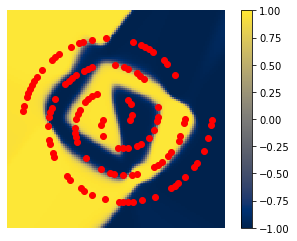

1.9643836

In [8]:
model = keras.models.Sequential([
    keras.layers.Dense(6, activation='tanh'),
    keras.layers.Dense(4, activation='tanh'),
    keras.layers.Dense(1, activation='tanh')])
model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=0.05))
model.fit(np.array(X_valid), np.array(y_valid), epochs=2000, batch_size=16, verbose=0)
visualize_model(model)
keras.losses.MeanSquaredError()(np.array(y_valid), model.predict(np.array(X_valid))).numpy()

In [9]:
problem_ga = GenAlgNN((np.array(X_train), np.array(y_train)), (np.array(X_valid), np.array(y_valid)))
ga_optimizer = ga.GAOptimizer(problem_ga)

In [10]:
def print_population(fitnesses, population):
    arr = [(1.0 / f - 1.0, i) for f, i in zip(fitnesses, population)]
    arr.sort(key=lambda t: t[0])
    for m, i in arr:
        print(f'mse={m:.4f} {i}')
    return arr

In [11]:
ga_optimizer.start(8)

In [12]:
for _ in range(6):
    old_population = ga_optimizer.population
    gen, old_fitnesses = ga_optimizer.next_generation()
    print_population(old_fitnesses, old_population)
    print('=== New generation ===')

mse=1.0958 [1, 2, 7, 5]
mse=1.2363 [5, 3, 1, 7]
mse=1.2504 [2, 3, 8, 1]
mse=1.2804 [5, 4, 1, 2]
mse=1.3914 [4, 0, 7, 5]
mse=1.4920 [1, 8, 4, 2]
mse=1.6220 [1, 6, 0, 7]
mse=1.6440 [6, 0, 3, 3]
=== New generation ===
mse=1.1627 [2, 3, 4, 1]
mse=1.3019 [2, 3, 8, 1]
mse=1.3407 [5, 2, 1, 5]
mse=1.3515 [1, 3, 7, 7]
mse=1.3680 [7, 2, 7, 5]
mse=1.4130 [5, 3, 1, 7]
mse=1.6969 [1, 6, 0, 7]
mse=1.8250 [1, 8, 8, 2]
=== New generation ===
mse=1.0153 [2, 3, 4, 1]
mse=1.0662 [2, 3, 4, 1]
mse=1.0802 [2, 3, 1, 1]
mse=1.0952 [1, 2, 7, 5]
mse=1.1480 [5, 3, 8, 7]
mse=1.3527 [2, 2, 1, 1]
mse=1.3545 [5, 3, 4, 5]
mse=1.8544 [7, 6, 0, 7]
=== New generation ===
mse=1.0037 [2, 2, 4, 5]
mse=1.0907 [5, 6, 0, 7]
mse=1.1760 [2, 3, 1, 1]
mse=1.1889 [1, 3, 4, 1]
mse=1.2958 [2, 2, 7, 5]
mse=1.2974 [2, 3, 1, 1]
mse=1.3317 [1, 3, 7, 1]
mse=1.3791 [7, 3, 8, 7]
=== New generation ===
mse=1.0295 [2, 2, 7, 5]
mse=1.0786 [2, 3, 1, 1]
mse=1.0959 [2, 2, 4, 5]
mse=1.1886 [5, 6, 0, 7]
mse=1.2260 [2, 2, 7, 1]
mse=1.3275 [7, 3, 8,

In [13]:
fitnesses = [problem_ga.fitness(i) for i in gen]
mse = print_population(fitnesses, gen)

mse=1.1068 [5, 6, 0, 5]
mse=1.1835 [5, 2, 4, 5]
mse=1.1868 [2, 3, 1, 1]
mse=1.2206 [2, 3, 1, 1]
mse=1.2275 [2, 2, 4, 7]
mse=1.3533 [7, 3, 1, 0]
mse=1.3784 [5, 3, 1, 5]
mse=1.4676 [7, 6, 4, 5]


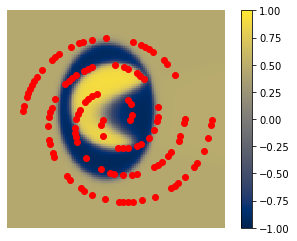

1.4130163

In [14]:
problem_ga.epochs = 4000
model = problem_ga.train_nn(mse[0][1])
visualize_model(model)
keras.losses.MeanSquaredError()(y_valid, model.predict(X_valid)).numpy()